## Let's not aim for 'fact gathering' here but let's focus on 'intuitive understanding'


## TensorFlow -- What's the Buzz

### An Unpolished Notebook

In [6]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [1]:
from IPython.display import HTML
HTML('<iframe width="853" height="480" src="https://www.youtube.com/embed/mWl45NkFBOc" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

Tensorflow is an open source software library for high performance numerical computation.Its flexible architecture 
allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops 
to clusters of servers to mobile and edge devices.
The number of commits as well the number of forks on TensorFlow Github repository are enough to define the wide-spreading 
popularity of TF (short for TensorFlow). 
However TensorFlow is not that easy to use.


In [ ]:
Keras is a high level API built on TensorFlow (and can be used on top of Theano too). 
It is more user-friendly and easy to use as compared to TF.

Keras is built on top of TF, what’s the difference between the two then? 
And if Keras is more user-friendly, why should I ever use TF for building deep learning models?

Keras is user-friendly: With Keras, you can build simple or very complex NN with minimal lines of code.
Although Keras provides all the general purpose functionalities for building Deep learning models,
it doesn’t provide as much as TF. TensorFlow offers more advanced operations as compared to Keras. 
This comes very handy if you are doing a research or developing some special kind of deep learning models.

Some examples of high level operations are:
Can use multiple threads for the same session for parallel computations and hence speed up your operations.
Debugger: With tf you get a specialized debugger.It provides visibility into the internal structure and states of running 
TensorFlow graphs.
Insights from debugger can be used to facilitate debugging of various types of bugs during both training and inference.
Control: With TF, you get such a control over your network. 
You can control whatever you want in your network. Operations on weights or gradients can be done like a charm in TF.


Conclusion: If you want more control over your network and want to watch closely your network then choose TF. However, if you
    are not doing some research work then fo for Keras.

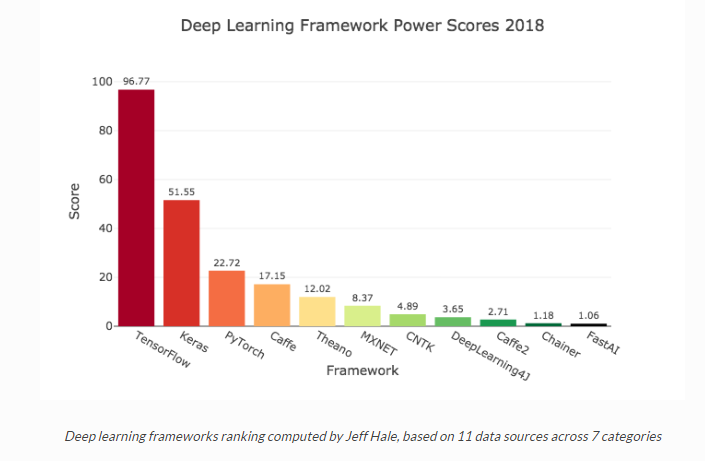

In [18]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "B:/"
Image(filename = PATH + "Image.png", width=800, height=800)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.4.0


## Why Fashion MNIST?

Original MNIST contains a lot of handwritten digits.Members of AI/ML/data Science community love this 
dataset and use it as a benchmark to validate their algorithms.

But why replace it with Fashion MNIST:
#MNIST is too easy: Convulational Neural Networks can achieve 99.7% on MNIST. Classic ML algortihms can also achieve that too.
MNIST is overused: In April 2017 Twitter thread, Google Brain research scientist and deep learning expert Ian Goodfellow calls for people to move away from MNIST



In [7]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion-mnist_train.csv')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/fashion-mnist_train.csv\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/fashion-mnist_train.csv\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/fashion-mnist_train.csv\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/fashion-mnist_train.csv\t10k-labels-idx1-ubyte.gz


In [8]:
test = input_data.read_data_sets('data/fashion-mnist_test.csv')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/fashion-mnist_test.csv\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/fashion-mnist_test.csv\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/fashion-mnist_test.csv\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/fashion-mnist_test.csv\t10k-labels-idx1-ubyte.gz


The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [16]:
type(data)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [101]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data_train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [102]:
#Train
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

In [103]:
#Test
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [104]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [105]:
data_train.shape

(60000, 785)

This shows that there are 60000 images in the training set and each image is represented as 28*28 which is 784.
Each label is an integer bteween 0 to 9.

In [33]:
data_test.shape

(10000, 785)

## Preprocessing Data

Data must be preprocessed before training the network. If we see the first image in the training set, we will see that
the pixel value fall in the range of 0 to 255.

In [106]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols)

In [107]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols)

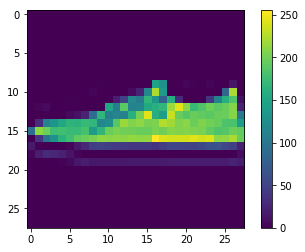

In [108]:
first_image = X_train[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels)
plt.colorbar()
plt.show()

Before feeding it to the neural network, we scale these value to rnage between 0 to 1.

In [109]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')
X_val = X_val.astype('float')
X_train /= 255
X_test /= 255
X_val /= 255

Let's display the first 25 images from the training set and see that the data is in correct format.

In [110]:
X_train[:2].shape

(2, 28, 28)

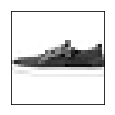

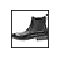

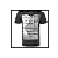

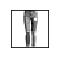

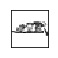

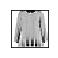

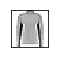

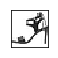

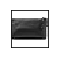

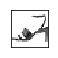

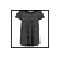

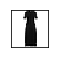

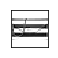

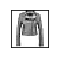

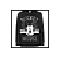

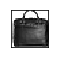

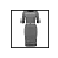

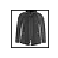

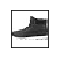

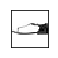

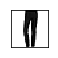

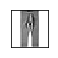

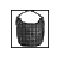

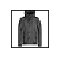

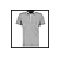

In [111]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    #plt.xlabel(np.concatenate(class_names,y_train[i]))
    plt.show()
   

## Building Model

Basic building block on Neural Network is the layer. Most of deep learning consist of chaining together simple layers.
Most layers like tf.keras.layers.Dense have paramters that are learned during the training

In [120]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [133]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer in this network, tf.keras.layers.
Flatten, transforms the format of the images from a 2d-array 
(of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. 
Think of this layer as unstacking rows of pixels in the image
and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. 
These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). 
The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. 
Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.



### Compile the Model

Loss function —This measures how accurate the model is during training.
We want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [134]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
from IPython.display import HTML
HTML('<iframe width="1280" height="720" src="https://www.youtube.com/embed/ErfnhcEV1O8" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

In [135]:
y_train.shape

(48000, 10)

In [136]:
X_train.shape

(48000, 28, 28)

In [143]:
Training = model.fit(X_train,y_train,epochs = 5,validation_data = (X_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 81us/step - loss: 0.2399 - acc: 0.9111 - val_loss: 0.3297 - val_acc: 0.8861
Epoch 2/5
48000/48000 [==============================] - 4s 81us/step - loss: 0.2363 - acc: 0.9125 - val_loss: 0.3269 - val_acc: 0.8865
Epoch 3/5
48000/48000 [==============================] - 4s 81us/step - loss: 0.2264 - acc: 0.9159 - val_loss: 0.3244 - val_acc: 0.8846
Epoch 4/5
48000/48000 [==============================] - 4s 81us/step - loss: 0.2198 - acc: 0.9174 - val_loss: 0.3268 - val_acc: 0.8868
Epoch 5/5
48000/48000 [==============================] - 4s 81us/step - loss: 0.2142 - acc: 0.9204 - val_loss: 0.3231 - val_acc: 0.8870


## Evaluate Accuracy

In [146]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.8908


In [147]:
print('Test Loss:', test_loss)

Test Loss: 0.311395390511


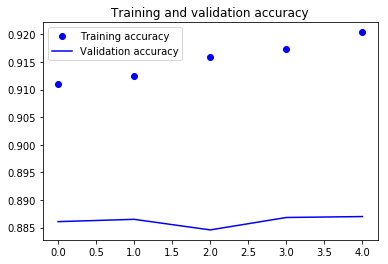

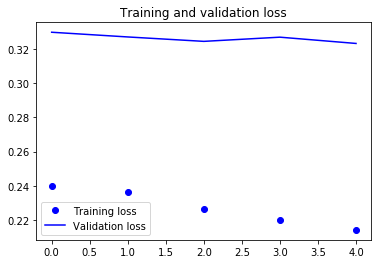

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = Training.history['acc']
val_accuracy = Training.history['val_acc']
loss = Training.history['loss']
val_loss = Training.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [150]:
predictions = model.predict(X_test)

In [159]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [161]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.84      0.83      0.84      1000
    Class 1       0.99      0.98      0.98      1000
    Class 2       0.85      0.77      0.81      1000
    Class 3       0.91      0.90      0.91      1000
    Class 4       0.79      0.90      0.84      1000
    Class 5       0.98      0.93      0.95      1000
    Class 6       0.73      0.72      0.72      1000
    Class 7       0.93      0.94      0.93      1000
    Class 8       0.97      0.97      0.97      1000
    Class 9       0.93      0.97      0.95      1000

avg / total       0.89      0.89      0.89     10000



In [151]:
predictions[0]

array([  7.67251670e-01,   8.22609342e-11,   6.53106440e-03,
         1.38733769e-04,   2.04498981e-04,   1.83296114e-10,
         2.25820825e-01,   6.85254875e-09,   5.31903279e-05,
         2.41402536e-12], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. 
We can see which label has the highest confidence value.

In [152]:
np.argmax(predictions[0])

0

In [153]:
class_names[0] # Model is confident that this is a t-shirt or top

'T-shirt/top'

In [155]:
y_test[0] # 1 at index 0 means the actual value is T-shirt/top which is correct

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [ ]:
# Let's look at 0th image predictions and prediction array

Text(0.5,0,'T-shirt/top 77% (T-shirt/top)')

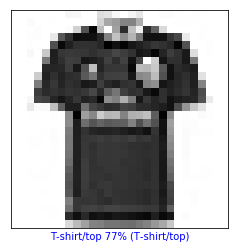

In [175]:
predictions_array, true_label, img = predictions[0], y_true[0], X_test[0]
plt.grid(False)
plt.xticks([])
plt.yticks([])
  
plt.imshow(img, cmap=plt.cm.binary)

predicted_label = np.argmax(predictions_array)
if predicted_label == true_label:
    color = 'blue'
else:
    color = 'red'
  
plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [163]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

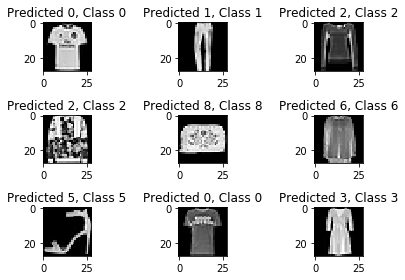

In [172]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

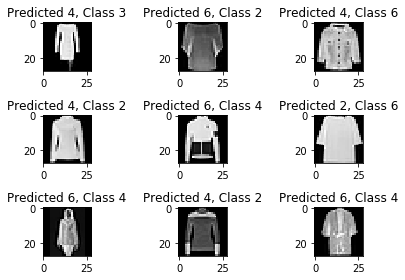

In [173]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()